# RAMSAC | Comparación con Nevada
Taller de tesis
Maestría

## Lectura de un json de prueba

In [2]:
dataPath = './rawData/'
# los fallidos son `AZUL CAEP MGUE mzae RWSN`
dataFile = 'rms.azul_gamit.json'

In [5]:
import json
# read json file
with open(dataPath + dataFile) as f:
    data = json.load(f)

In [8]:
print(data.keys())

dict_keys(['time_series', 'Network', 'Jumps', 'lon', 'wrms', 'Polynomial', 'Periodic', 'Station', 'neu_covariance', 'lat', 'ref_z', 'ref_y', 'ref_x', 'xyz_covariance'])


In [13]:
data['time_series'].keys()

dict_keys(['mjd', 'e', 'model_neu', 'n', 'filter', 'u', 't', 'y', 'x', 'z', 'weights', 'residuals'])

In [14]:
import matplotlib.pyplot as plt

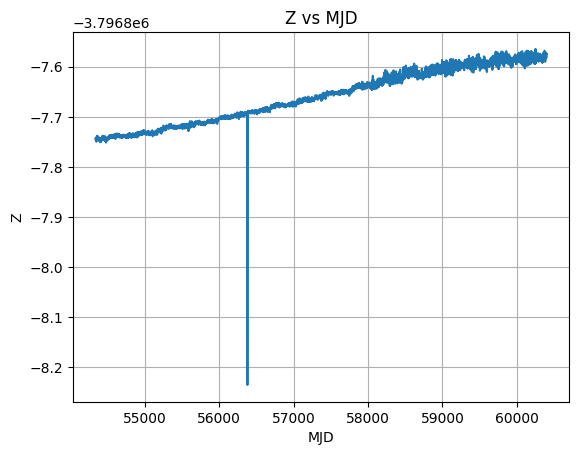

In [22]:
fig, ax = plt.subplots()
ax.plot(data['time_series']['mjd'], data['time_series']['z'])
ax.set_xlabel('MJD')
ax.set_ylabel('Z')
ax.set_title('Z vs MJD')
ax.grid(True)
plt.show()